# 第14章聚类方法

1.聚类是针对给定的样本，依据它们属性的相似度或距离，将其归并到若干个“类”或“簇”的数据分析问题。一个类是样本的一个子集。直观上，相似的样本聚集在同类，不相似的样本分散在不同类。

2.距离或相似度度量在聚类中起着重要作用。

常用的距离度量有闵可夫斯基距离，包括欧氏距离、曼哈顿距离、切比雪夫距离以及马哈拉诺比斯距离。常用的相似度度量有相关系数、夹角余弦。
用距离度量相似度时，距离越小表示样本越相似；用相关系数时，相关系数越大表示样本越相似。

3.类是样本的子集，比如有如下基本定义：
用$G$表示类或簇，用$x_i$,$x_j$；等表示类中的样本，用$d_{ij}$表示样本$x_i$与样本$x_j$之间的距离。如果对任意的$x _ { i } , x _ { j } \in G$，有$$d _ { i j } \leq T$$
则称$G$为一个类或簇。

描述类的特征的指标有中心、直径、散布矩阵、协方差矩阵。

4.聚类过程中用到类与类之间的距离也称为连接类与类之间的距离包括最短距离、最长距离、中心距离、平均距离。

5.层次聚类假设类别之间存在层次结构，将样本聚到层次化的类中层次聚类又有聚合或自下而上、分裂或自上而下两种方法。

聚合聚类开始将每个样本各自分到一个类；之后将相距最近的两类合并，建立一个新的类，重复此操作直到满足停止条件；得到层次化的类别。分裂聚类开始将所有样本分到一个类；之后将已有类中相距最远的样本分到两个新的类，重复此操作直到满足停止条件；得到层次化的类别。

聚合聚类需要预先确定下面三个要素：

（1）距离或相似度；
（2）合并规则；
（3）停止条件。

根据这些概念的不同组合，就可以得到不同的聚类方法。

6.$k$均值聚类是常用的聚类算法，有以下特点。基于划分的聚类方法；类别数k事先指定；以欧氏距离平方表示样本之间的距离或相似度，以中心或样本的均值表示类别；以样本和其所属类的中心之间的距离的总和为优化的目标函数；得到的类别是平坦的、非层次化的；算法是迭代算法，不能保证得到全局最优。

$k$均值聚类算法，首先选择k个类的中心，将样本分到与中心最近的类中，得到一个聚类结果；然后计算每个类的样本的均值，作为类的新的中心；重复以上步骤，直到收敛为止。

### 层次聚类 

1. **聚合**（自下而上）：聚合法开始将每个样本各自分裂到一个类，之后将相距最近的两类合并，建立一个新的类，重复次操作知道满足停止条件，得到层次化的类别。

2. **分裂**（自上而下）： 分裂法开始将所有样本分到一个类，之后将已有类中相距最远的样本分到两个新的类，重复此操作直到满足停止条件，得到层次化的类别。


### k均值聚类

k均值聚类是基于中心的聚类方法，通过迭代，将样本分到k个类中，使得每个样本与其所属类的中心或均值最近，得到k个平坦的，非层次化的类别，构成对空间的划分。

In [1]:
import math
import random
import numpy as np
from sklearn import datasets,cluster
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris() # 加载数据集

In [3]:
gt = iris['target'];gt # ;是个分隔符，用于把代码写在一行上

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

3类

In [4]:
iris['data'][:,:2].shape # 形状：150行，取前两列

(150, 2)

In [5]:
data = iris['data'][:,:2] # 取150行，前两列

In [6]:
x = data[:,0] # 第一列作为x
y = data[:,1] # 第二列作为y

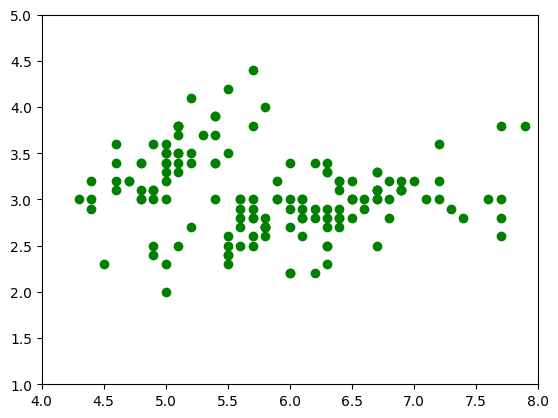

In [7]:
plt.scatter(x, y, color='green') # 散点图
plt.xlim(4, 8) # x轴的范围
plt.ylim(1, 5) # y轴的范围
plt.show() # 展示

In [8]:
# 定义聚类数的节点

class ClusterNode:
    def __init__(self, vec, left=None, right=None, distance=-1, id=None, count=1):
        """
        :param vec: 保存两个数据聚类后形成新的中心
        :param left: 左节点
        :param right:  右节点
        :param distance: 两个节点的距离
        :param id: 用来标记哪些节点是计算过的
        :param count: 这个节点的叶子节点个数
        """
        self.vec = vec
        self.left = left
        self.right = right
        self.distance = distance
        self.id = id
        self.count = count

In [9]:
def euler_distance(point1: np.ndarray, point2: list) -> float:
    """
    计算两点之间的欧拉距离，支持多维
    """
    distance = 0.0 # 距离
    for a, b in zip(point1, point2):
        distance += math.pow(a - b, 2) # 两样本的差的平方，累加
    return math.sqrt(distance) # 开根号

In [10]:
# 层次聚类（聚合法）

class Hierarchical:
    def __init__(self, k):
        self.k = k
        self.labels = None
        
    def fit(self, x):
        nodes = [ClusterNode(vec=v, id=i) for i, v in enumerate(x)] # 生成节点集（每个样本是为一个类），id为i，值为v
        distances = {} # 距离集合（字典，key为）
        point_num, feature_num = x.shape # 节点数量，特征数量
        self.labels = [-1] * point_num # 初始化标签为-1，150个
        currentclustid = -1 # 用于给新的类赋id，从-1开始
        while(len(nodes)) > self.k: # 直到k个类为止
            min_dist = math.inf # 初始化最小值
            nodes_len = len(nodes) # 节点长度
            closest_part = None # 初始化最近
            for i in range(nodes_len - 1): # 遍历每个节点i到除本身外，求距离
                for j in range(i+1, nodes_len): # 除i外之后的
                    d_key = (nodes[i].id, nodes[j].id) # 唯一表示节点i到节点j的距离
                    if d_key not in distances: # 不在距离集合中，再计算
                        distances[d_key] = euler_distance(nodes[i].vec, nodes[j].vec) # 计算欧式距离，放入集合中
                    d = distances[d_key] # 取出节点i到j的距离
                    if d < min_dist: # 判断是否是最小距离
                        min_dist = d # 是最小
                        closest_part = (i, j) #最近的组
                        
            part1, part2 = closest_part # 最近的节点A和B
            node1, node2 = nodes[part1], nodes[part2] # 取出两个节点
            new_vec = [ (node1.vec[i] * node1.count + node2.vec[i] * node2.count ) / (node1.count + node2.count)
                        for i in range(feature_num)] # 算个平均向量
            new_node = ClusterNode(vec=new_vec,
                                   left=node1, # 节点A是新类的左孩子
                                   right=node2, # B是右孩子
                                   distance=min_dist, # 最小距离（左右孩子的）
                                   id=currentclustid, # 新的id
                                   count=node1.count + node2.count) # 新的类
            currentclustid -= 1 # id减一
            del nodes[part2], nodes[part1] # 删除节点集合中的已聚类节点，先删索引值大的，防止错删
            nodes.append(new_node) # 新的类加入节点集
            
        self.nodes = nodes # 更新
        self.calc_label() # 计算标签
        
    def calc_label(self):
        """
        调取聚类的结果
        """
        for i, node in enumerate(self.nodes):
            # 将节点的所有叶子节点都分类
            self.leaf_traversal(node, i)

    def leaf_traversal(self, node: ClusterNode, label):
        """
        递归遍历叶子节点
        """
        if node.left == None and node.right == None:
            self.labels[node.id] = label
        if node.left:
            self.leaf_traversal(node.left, label) # 左孩子
        if node.right:
            self.leaf_traversal(node.right, label) # 右
            
# https://zhuanlan.zhihu.com/p/32438294

In [11]:
my = Hierarchical(3) # 初始化
my.fit(data) # 聚类
labels = np.array(my.labels) # 聚类结果
print(labels) # 打印

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 1 0 0 1 2 1 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


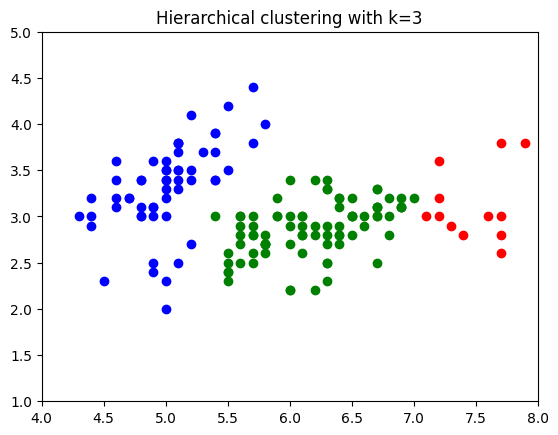

In [12]:
# visualize result

cat1 = data[np.where(labels==0)]
cat2 = data[np.where(labels==1)]
cat3 = data[np.where(labels==2)]

plt.scatter(cat1[:,0], cat1[:,1], color='green')
plt.scatter(cat2[:,0], cat2[:,1], color='red')
plt.scatter(cat3[:,0], cat3[:,1], color='blue')
plt.title('Hierarchical clustering with k=3')
plt.xlim(4, 8)
plt.ylim(1, 5)
plt.show()

In [13]:
sk = cluster.AgglomerativeClustering(3) # 调用封装好的层次聚类
sk.fit(data) # 训练
labels_ = sk.labels_ # 聚类结果
print(labels_) # 打印

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 1 0 1 1 0 2 0 2 0 2 2 2 2 0 0 2 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 2 2 2 2 0 2 1 2 2 2 0 1 2 0 2 0 0 0 0 1 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0]


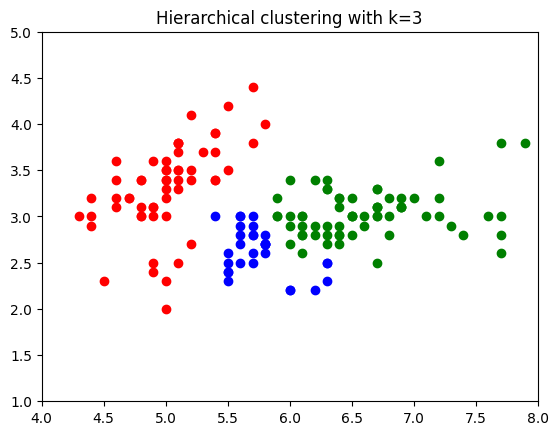

In [14]:
# visualize result of sklearn

cat1_ = data[np.where(labels_==0)]
cat2_ = data[np.where(labels_==1)]
cat3_ = data[np.where(labels_==2)]

plt.scatter(cat1_[:,0], cat1_[:,1], color='green')
plt.scatter(cat2_[:,0], cat2_[:,1], color='red')
plt.scatter(cat3_[:,0], cat3_[:,1], color='blue')
plt.title('Hierarchical clustering with k=3')
plt.xlim(4, 8)
plt.ylim(1, 5)
plt.show()

---------------------------------------------------------------------------------------------------------------------------------

In [15]:
# kmeans

class MyKmeans:
    def __init__(self, k, n=20):
        self.k = k # k个子集
        self.n = n # epochs
        
    def fit(self, x, centers=None):
        # 第一步，随机选择 K 个点, 或者指定
        if centers is None:
            idx = np.random.randint(low=0, high=len(x), size=self.k) # 随机k个id
            centers = x[idx] # 取出k个x，作为中心
        #print(centers)
        
        inters = 0 # epoch
        while inters < self.n:
            #print(inters)
            #print(centers)
            points_set = {key: [] for key in range(self.k)}

            # 第二步，遍历所有点 P，将 P 放入最近的聚类中心的集合中
            for p in x:
                nearest_index = np.argmin(np.sum((centers - p) ** 2, axis=1) ** 0.5) # 返回与某中心的欧氏距离的最小的中心索引0或1或2
                points_set[nearest_index].append(p)

            # 第三步，遍历每一个点集，计算新的聚类中心
            for i_k in range(self.k):
                centers[i_k] = sum(points_set[i_k])/len(points_set[i_k]) # 新的聚类中心
                
            inters += 1 # 自增

        
            
        return points_set, centers # 返回最终聚类和中心
        

In [32]:
m = MyKmeans(3) # 实例化，k=3
points_set, centers = m.fit(data) # 聚类，得到最终聚类和中心

In [17]:
centers # 打印聚类中心

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]])

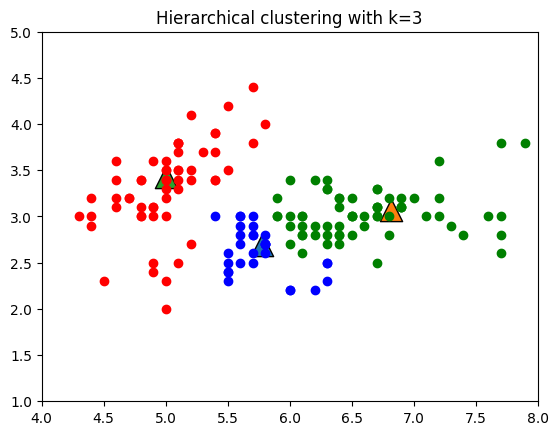

In [18]:
# visualize result

cat1 = np.asarray(points_set[0])
cat2 = np.asarray(points_set[1])
cat3 = np.asarray(points_set[2])

for ix, p in enumerate(centers):
    plt.scatter(p[0], p[1], color='C{}'.format(ix), marker='^', edgecolor='black', s=256)
        
plt.scatter(cat1_[:,0], cat1_[:,1], color='green')
plt.scatter(cat2_[:,0], cat2_[:,1], color='red')
plt.scatter(cat3_[:,0], cat3_[:,1], color='blue')
plt.title('Hierarchical clustering with k=3')
plt.xlim(4, 8)
plt.ylim(1, 5)
plt.show()

In [33]:
# using sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100).fit(data) # sklearn的聚类算法，训练，k=3
gt_labels__ = kmeans.labels_ # 聚类结果
centers__ = kmeans.cluster_centers_ # 中心

d:\Development-Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
gt_labels__ # 打印结果

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [21]:
centers__ # 打印聚类中心

array([[6.81276596, 3.07446809],
       [5.77358491, 2.69245283],
       [5.006     , 3.428     ]])

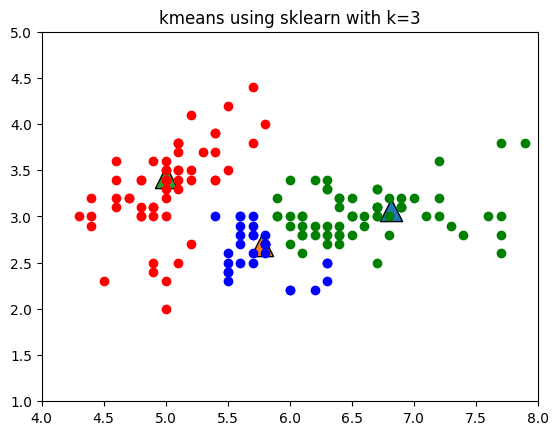

In [22]:
# visualize result

cat1 = data[gt_labels__ == 0]
cat2 = data[gt_labels__ == 1]
cat3 = data[gt_labels__ == 2]

for ix, p in enumerate(centers__):
    plt.scatter(p[0], p[1], color='C{}'.format(ix), marker='^', edgecolor='black', s=256)
        
plt.scatter(cat1_[:,0], cat1_[:,1], color='green')
plt.scatter(cat2_[:,0], cat2_[:,1], color='red')
plt.scatter(cat3_[:,0], cat3_[:,1], color='blue')
plt.title('kmeans using sklearn with k=3')
plt.xlim(4, 8)
plt.ylim(1, 5)
plt.show()

#### 寻找 K 值

d:\Development-Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Development-Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Development-Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Development-Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Development-Files\Python38\lib\si

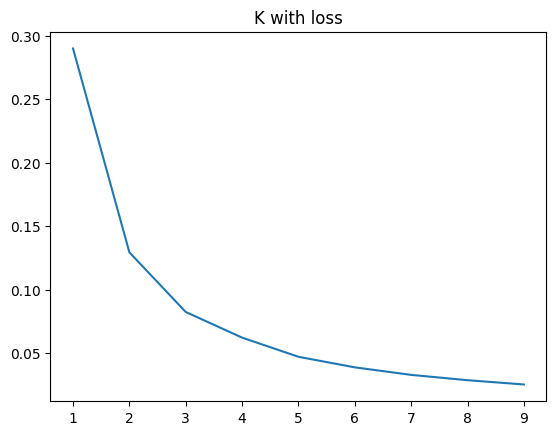

In [35]:
from sklearn.cluster import KMeans # 导包

loss = [] # loss集合

for i in range(1, 10): # 遍历
    kmeans = KMeans(n_clusters=i, max_iter=100).fit(data) # 聚类，k从1到10
    loss.append(kmeans.inertia_ / len(data) / 3) # 加入到loss集合中

plt.title('K with loss')
plt.plot(range(1, 10), loss)
plt.show()

##### 例 14.2

In [24]:
X = [[0, 2], [0, 0], [1, 0], [5, 0], [5, 2]] # 数据集

In [25]:
np.asarray(X) # 打印

array([[0, 2],
       [0, 0],
       [1, 0],
       [5, 0],
       [5, 2]])

In [26]:
m = MyKmeans(2, 100) # 实例化，k=2，迭代100次
points_set, centers = m.fit(np.asarray(X)) # 结果

In [27]:
points_set # 打印结果

{0: [array([0, 0]), array([1, 0]), array([5, 0]), array([5, 2])],
 1: [array([0, 2])]}

In [28]:
centers # 聚类中心

array([[2, 0],
       [0, 2]])

In [29]:
kmeans = KMeans(n_clusters=2, max_iter=100).fit(np.asarray(X)) # 使用sklearn的算法

d:\Development-Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
kmeans.labels_ # 打印结果

array([0, 0, 0, 1, 1])

In [31]:
kmeans.cluster_centers_ # 中心

array([[0.33333333, 0.66666667],
       [5.        , 1.        ]])

----
本章代码来源：https://github.com/hktxt/Learn-Statistical-Learning-Method

本文代码更新地址：https://github.com/fengdu78/lihang-code

中文注释制作：机器学习初学者公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)